## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap
 
---
    
### 2. Desarrollo:

En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
4. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
5. Grafica cada una de las listas resultantes en un histograma.
6. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/athlete_olympic_events-clean.csv', index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [ ]:
df['age'].describe()

count    206165.000000
mean         25.055509
std           5.483096
min          11.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          71.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

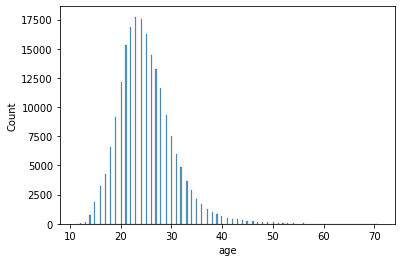

In [ ]:
sns.histplot(data=df,x='age')

<AxesSubplot:xlabel='age'>

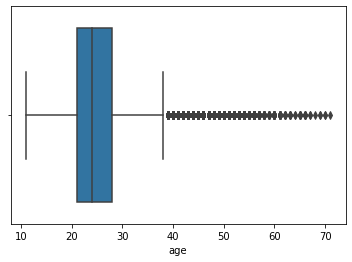

In [ ]:
sns.boxplot(data=df,x='age')

In [ ]:
df_simp = df[df['age'] < 40]

Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.

b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.

c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.

Grafica cada una de las listas resultantes en un histograma.
Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

<AxesSubplot:ylabel='Count'>

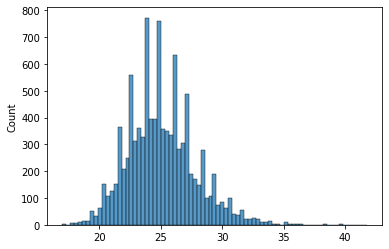

In [ ]:
medias = []

for i in range(10_000):
    muestra = df['age'].sample(n=4,replace=True)
    medias.append(muestra.mean())

media_serie1 = pd.Series(medias)
sns.histplot(media_serie1)

In [ ]:
def describir(df):
    print(f'descripción:{df.describe()} \n asimetría:{df.skew()} \n kurtosis:{df.kurtosis()}')

<AxesSubplot:ylabel='Count'>

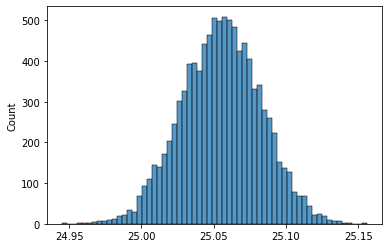

In [ ]:
medias = []

for i in range(10_000):
    muestra = df['age'].sample(frac=0.2,replace=True)
    medias.append(muestra.mean())

media_serie2 = pd.Series(medias)
sns.histplot(media_serie2)

<AxesSubplot:ylabel='Count'>

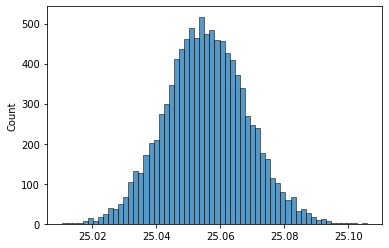

In [ ]:
medias = []

for i in range(10_000):
    muestra = df['age'].sample(frac=0.9,replace=True)
    medias.append(muestra.mean())

media_serie3 = pd.Series(medias)
sns.histplot(media_serie3)

In [ ]:
describir(media_serie1)

descripción:count    10000.000000
mean        24.676100
std          2.418959
min         17.250000
25%         23.000000
50%         24.500000
75%         26.250000
max         34.750000
dtype: float64 
 asimetría:0.22346726390339353 
 kurtosis:0.02414397995253692


In [ ]:
describir(media_serie2)

descripción:count    10000.000000
mean        24.684782
std          0.023851
min         24.592186
25%         24.668817
50%         24.685213
75%         24.700744
max         24.784516
dtype: float64 
 asimetría:-0.04121664097592363 
 kurtosis:0.021882173049170728


In [ ]:
describir(media_serie3)


descripción:count    10000.000000
mean        24.684497
std          0.011258
min         24.620546
25%         24.676870
50%         24.684480
75%         24.691991
max         24.726816
dtype: float64 
 asimetría:-0.01709009340331485 
 kurtosis:0.009302804380940888


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>